In [4]:
#Import Python Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Crop and fertilizer dataset.csv')

In [6]:
data

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
...,...,...,...,...,...,...,...,...,...,...,...
4508,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4509,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4510,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4511,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo


In [7]:
#Count Null values
data.isnull().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
Link             0
dtype: int64

In [8]:
#No. of Rows and Columns
data.shape

(4513, 11)

In [9]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


In [10]:
#No. of Duplicates
data.duplicated().sum()

0

In [11]:
#Describe the data
data.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.337470,63.598493,6.715267,819.189010,25.915134
std,38.060648,16.547797,35.694293,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


In [13]:
corr = data.select_dtypes(include=['number']).corr()
print(corr)


             Nitrogen  Phosphorus  Potassium        pH  Rainfall  Temperature
Nitrogen     1.000000    0.709546   0.584336  0.182850  0.269364    -0.010213
Phosphorus   0.709546    1.000000   0.573901  0.244992  0.225584    -0.055219
Potassium    0.584336    0.573901   1.000000  0.075172  0.445647     0.053316
pH           0.182850    0.244992   0.075172  1.000000  0.097884    -0.002949
Rainfall     0.269364    0.225584   0.445647  0.097884  1.000000     0.315045
Temperature -0.010213   -0.055219   0.053316 -0.002949  0.315045     1.000000


<Axes: >

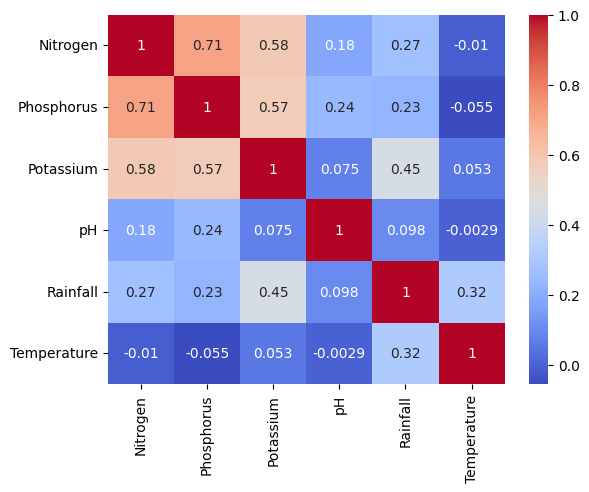

In [14]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True , cmap='coolwarm')

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

def perform_encoding(df, columns, encoder=None):
    if encoder is None:
        encoder = OneHotEncoder(sparse_output==False, handle_unknown='ignore')
        encoder.fit(df[columns])
    encoded_data = pd.DataFrame(encoder.transform(df[columns]))
    feature_names = encoder.get_feature_names_out(columns)
    encoded_data.columns = feature_names
    return encoded_data, encoder

# Prepare the data
X_categorical = data[['District_Name', 'Soil_color']]
X_numerical = data[['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']]
y = data[['Crop', 'Fertilizer']]

# Handle error for float to string conversion in District_Name and Soil_color
district_name = input("Enter the District Name: ")
soil_color = input("Enter the Soil Color: ")

# Prepare the input data
input_categorical = pd.DataFrame({
    'District_Name': [district_name],
    'Soil_color': [soil_color]
})
input_numerical = pd.DataFrame({
    'Nitrogen': [float(input("Enter Nitrogen level: "))],
    'Phosphorus': [float(input("Enter Phosphorus level: "))],
    'Potassium': [float(input("Enter Potassium level: "))],
    'pH': [float(input("Enter pH level: "))],
    'Rainfall': [float(input("Enter Rainfall level: "))],
    'Temperature': [float(input("Enter Temperature level: "))]
})

# Encode the categorical variables in the dataset
categorical_columns = ['District_Name', 'Soil_color']
X_categorical_encoded, encoder = perform_encoding(X_categorical, categorical_columns)
print("X_categorical_encoded")
print(X_categorical_encoded)

print("encoder")
print(encoder)

# Concatenate the encoded categorical variables with the numerical variables
X_encoded = pd.concat([X_categorical_encoded, X_numerical], axis=1)
print(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(y_train)

# Encode the input data
input_categorical_encoded, _ = perform_encoding(input_categorical, categorical_columns, encoder)
input_encoded = pd.concat([input_categorical_encoded, input_numerical], axis=1)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the output
prediction = model.predict(input_encoded)

# Print the predicted crop and fertilizer
output_crop = prediction[0][0]
output_fertilizer = prediction[0][1]

# Find the corresponding link for the predicted crop and fertilizer
link = data[(data['Crop'] == output_crop) & (data['Fertilizer'] == output_fertilizer)]['Link'].values[0]

print("Predicted Crop:", output_crop)
print("Predicted Fertilizer:", output_fertilizer)
print("Link:", link)

# Save the model using pickle
functions = {
    'perform_encoding': perform_encoding,
    'model': model
}

with open('model.pkl', 'wb') as f:
    pickle.dump(functions, f)

# Load the model back
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
X_train.head()

,District_Name_Kolhapur,District_Name_Pune,District_Name_Sangli,District_Name_Satara,District_Name_Solapur,Soil_color_Black,Soil_color_Dark Brown,Soil_color_Light Brown,Soil_color_Medium Brown,Soil_color_Red,Soil_color_Red,Soil_color_Reddish Brown,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
3903,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,25,50,6.0,1600,25
999,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,85,55,40,6.5,800,15
2366,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,85,50,45,7.0,1400,30
1474,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120,75,80,8.5,500,25
3859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,70,60,45,6.0,800,25
